In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import time


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/CA_2_dataset.csv')
data.head()

,Unnamed: 0,Age,Income,Student,Credit_rate,Default
0,0,youth,high,no,fair,no
1,1,youth,high,no,excellent,no
2,2,middle_age,high,no,fair,yes
3,3,senior,mediium,no,fair,yes
4,4,senior,low,yes,fair,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   14 non-null     int64
 1   Age          14 non-null     int64
 2   Income       14 non-null     int64
 3   Student      14 non-null     int64
 4   Credit_rate  14 non-null     int64
 5   Default      14 non-null     int64
dtypes: int64(6)
memory usage: 800.0 bytes


In [ ]:
df.isnull().sum()

Unnamed: 0     0
Age            0
Income         0
Student        0
Credit_rate    0
Default        0
dtype: int64

In [ ]:
data.shape

(14, 6)

In [ ]:
df.describe()

,Unnamed: 0,Age,Income,Student,Credit_rate,Default
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,6.5000,2.000000,2.000000,0.500000,0.428571,0.642857
std,4.1833,0.877058,0.784465,0.518875,0.513553,0.497245
min,0.0000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.2500,1.000000,1.250000,0.000000,0.000000,0.000000
50%,6.5000,2.000000,2.000000,0.500000,0.000000,1.000000
75%,9.7500,3.000000,2.750000,1.000000,1.000000,1.000000
max,13.0000,3.000000,3.000000,1.000000,1.000000,1.000000


In [ ]:
data['Default'].value_counts(normalize=True)

yes    0.642857
no     0.357143
Name: Default, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype=='object':
        data[col]= le.fit_transform(data[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   14 non-null     int64
 1   Age          14 non-null     int64
 2   Income       14 non-null     int64
 3   Student      14 non-null     int64
 4   Credit_rate  14 non-null     int64
 5   Default      14 non-null     int64
dtypes: int64(6)
memory usage: 800.0 bytes


In [ ]:
data['Default'].value_counts(normalize=True)

1    0.642857
0    0.357143
Name: Default, dtype: float64

In [ ]:
from math import log2
entropy = -(9/14)*log2(9/14)-(5/14)*log2(5/14)
entropy

0.9402859586706309

In [ ]:
X= data.drop('Default', axis=1)
y= data['Default']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((11, 5), (3, 5))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify = y, random_state = 90)
tree = DecisionTreeClassifier(random_state = 90, criterion = "entropy")
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.500


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,y_pred_train)
acc_test = accuracy_score(y_test,y_pred_test)
acc_train, acc_test

(1.0, 0.75)

In [ ]:
importance = dt.feature_importances_
importance

array([0.45138889, 0.20833333, 0.        , 0.34027778])

In [ ]:
X_train.columns

Index(['Unnamed: 0', 'Age', 'Income', 'Student', 'Credit_rate'], dtype='object')

In [ ]:
entropy_student = (7/14*(-((6/7*log2(6/7))+ (1/7*log2(1/7)))) + 7/14*(-((3/7*log2(3/7))+(4/7*log2(4/7)))))
entropy_student

0.7884504573082896

In [ ]:
Info_gain_student = 0.94-0.79
Info_gain_student

0.1499999999999999

In [ ]:
entropy_credit = (6/14*(-((3/6*log2(3/6))+ (3/6*log2(3/6)))) + 8/14*(-((6/8*log2(6/8))+(2/8*log2(2/8)))))
entropy_credit

0.8921589282623617

In [ ]:
Info_gain_credit = 0.94-0.89
Info_gain_credit

0.04999999999999993

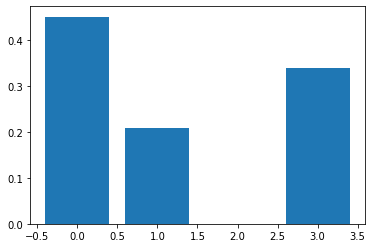

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()